# With and without clustering experiment

In [11]:
import pandas as pd

training_sizes = [100,90,80,70,60,50,40,30,20,10]
dfs = {}
dfs_clustering = {}
dfs_noclustering = {}

# load results from res.csv in each experiment
for size in training_sizes:
    dfs[size] = pd.read_csv(f"../trainsetsize/{str(size)}/res.csv")

In [12]:
# get the clustering results with 0 epsilon
for size in training_sizes:
    print(f"Results for {size} training size")
    dfs_clustering[size] = dfs[size][dfs[size]['approach'] == "clustering"]
    dfs_noclustering[size] = dfs[size][dfs[size]['approach'] == "noclustering"]
    print(dfs_clustering[size].to_string(index=False))
    print(dfs_noclustering[size].to_string(index=False))
    print("\n")

Results for 100 training size
  approach     packer  samples_num  unknown_rate  false_positive_rate  precision  recall  f1_score  accuracy  avg_num_instances
clustering   kkrunchy       1435.0           0.0               0.0001       1.00    0.99      1.00      1.00             116.60
clustering     mpress       1435.0           0.0               0.0018       0.99    0.98      0.98      1.00             121.34
clustering   obsidium       1435.0           0.0               0.0031       0.98    0.98      0.98      0.99             133.77
clustering  pecompact       1434.0           0.0               0.0012       0.99    1.00      0.99      1.00             119.24
clustering     pelock       1435.0           0.0               0.0002       1.00    0.96      0.98      1.00             136.56
clustering     petite       1434.0           0.0               0.0001       1.00    0.99      0.99      1.00             118.18
clustering     telock       1432.0           0.0               0.0107     

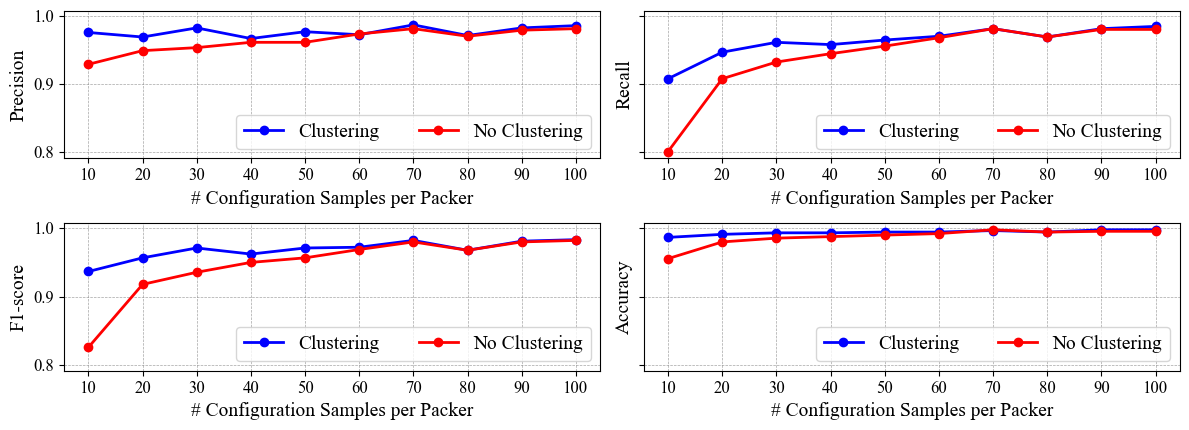

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.family"] = "Times New Roman"

plt_names = {'precision': 'Precision', 'recall': 'Recall', 'f1_score': 'F1-score', 'accuracy': 'Accuracy', 'false_positive_rate': 'FPR', 'unknown_rate': 'Unknown Rate'}
metrics_clustering = {'precision': [], 'f1_score': [], 'recall': [], 'accuracy': []}
metrics_noclustering = {'precision': [], 'f1_score': [], 'recall': [], 'accuracy': []}

# Extract data from each dataframe
for metric in metrics_clustering.keys():
    for size in training_sizes:
        metrics_clustering[metric].append(dfs_clustering[size][metric].mean())
        metrics_noclustering[metric].append(dfs_noclustering[size][metric].mean())

# Adjust number of rows and columns based on the number of metrics
num_metrics = len(metrics_clustering)
rows = int(np.ceil(num_metrics / 2))  # Use numpy.ceil to handle odd number of metrics
cols = 2  # Adjust columns as needed

# Create the figure with a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 2.2), sharey=True)  # Adjust figsize based on number of metrics

# Flatten the axes for easier iteration (if using more than 2 columns)
if cols > 2:
    axes = axes.flatten()

j = 0

# Plot each metric on a separate subplot
for i, metric in enumerate(metrics_clustering.keys()):
    # Handle cases where metrics exceed available subplots
    if i >= num_metrics:
        continue  # Skip plotting if no more subplots are available

    if i == 2:
        j = 1
    
    # Access the current subplot using indexing
    ax = axes[i % rows, j]  # Assuming 2 columns (adjust for more columns)
    ax.plot(training_sizes, metrics_clustering[metric], label=metric, marker='o', color='blue', linestyle='-', linewidth=2)
    ax.plot(training_sizes, metrics_noclustering[metric], label=metric, marker='o', color='red', linestyle='-', linewidth=2)
    ax.set_xlabel('# Configuration Samples per Packer', fontsize=14)
    ax.set_ylabel(plt_names[metric], fontsize=14)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.7)  # Customize grid
    ax.tick_params(labelsize=12)  # Set both x and y tick labels size
    ax.legend(['Clustering', 'No Clustering'], loc='lower right', ncol=2, fontsize=14)  # Adjust legend based on number of metrics
    ax.set_xticks([i for i in range(10, 110, 10)])

# Improve spacing between subplots (optional)
plt.tight_layout()

plt.savefig('', format='pdf')  # Uncomment to save the figure

# Show the plot
plt.show()


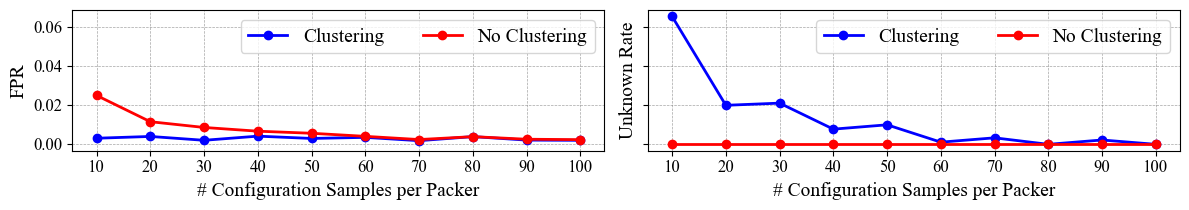

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.family"] = "Times New Roman"

metrics_clustering = {'false_positive_rate': [], 'unknown_rate': []}
metrics_noclustering = {'false_positive_rate': [], 'unknown_rate': []}

# Extract data from each dataframe
for metric in metrics_clustering.keys():
    for size in training_sizes:
        metrics_clustering[metric].append(dfs_clustering[size][metric].mean())
        metrics_noclustering[metric].append(dfs_noclustering[size][metric].mean())

# Adjust number of rows and columns based on the number of metrics
num_metrics = len(metrics_clustering)
rows = int(np.ceil(num_metrics / 2))  # Use numpy.ceil to handle odd number of metrics
cols = 2  # Adjust columns as needed

# Create the figure with a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 2.2), sharey=True)  # Adjust figsize based on number of metrics

# Flatten the axes for easier iteration (if using more than 2 columns)
if cols > 2:
    axes = axes.flatten()

j = 0

# Plot each metric on a separate subplot
for i, metric in enumerate(metrics_clustering.keys()):
    # Handle cases where metrics exceed available subplots
    if i >= num_metrics:
        continue  # Skip plotting if no more subplots are available

    if i == 2:
        j = 1
    
    # Access the current subplot using indexing
    ax = axes[i]  # Assuming 2 columns (adjust for more columns)
    ax.plot(training_sizes, metrics_clustering[metric], label=metric, marker='o', color='blue', linestyle='-', linewidth=2)
    ax.plot(training_sizes, metrics_noclustering[metric], label=metric, marker='o', color='red', linestyle='-', linewidth=2)
    ax.set_xlabel('# Configuration Samples per Packer', fontsize=14)
    ax.set_ylabel(plt_names[metric], fontsize=14)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)  # Customize grid
    ax.tick_params(labelsize=12)  # Set both x and y tick labels size
    ax.legend(['Clustering', 'No Clustering'], loc='upper right', ncol=2, fontsize=14)  # Adjust legend based on number of metrics
    ax.set_xticks([i for i in range(10, 110, 10)])

# Improve spacing between subplots (optional)
plt.tight_layout()

plt.savefig('', format='pdf')  # Uncomment to save the figure

# Show the plot
plt.show()

In [15]:
import pickle

plt_names = {'avg_num_instances': 'Mean Number of Inference Calls'}

metrics_clustering_avg = {'avg_num_instances': []}
metrics_noclustering_avg = {'avg_num_instances': []}
metrics_clustering_std = {'avg_num_instances': []}
metrics_noclustering_std = {'avg_num_instances': []}

# Extract data from each dataframe
for metric in metrics_clustering_avg.keys():
    for size in training_sizes:
        metrics_clustering_avg[metric].append(dfs_clustering[size][metric].mean())
        metrics_noclustering_avg[metric].append(dfs_noclustering[size][metric].mean())
        metrics_clustering_std[metric].append(dfs_clustering[size][metric].std())
        metrics_noclustering_std[metric].append(dfs_noclustering[size][metric].std())

# Read clusters and calculate number of clusters for each training size
CLUSTERING_PATH  = "../trainsetsize/"
clusters = {}
for size in training_sizes:
    clusters[size] = pickle.load(open(f"{CLUSTERING_PATH}{size}/clustering.pkl", "rb"))

clusters_count = {}
for size in training_sizes:
    clusters_count[size] = len(clusters[size]['medoids'])

# Print a table of the results with and without clustering with the average number of instances for each training size in latex format and standard deviation

print("\\begin{table}[H]")
print("\\centering")
print("\\begin{tabular}{|c|c|c|c|}")
print("\\hline")
print("Training Size & #Clusters & Clustering & No Clustering \\\\")
print("\\hline")
for i in range(len(training_sizes) - 1, -1, -1):
    print(f"{training_sizes[i]} & "
          f"{clusters_count[training_sizes[i]]} & "
          f"{metrics_clustering_avg['avg_num_instances'][i]:.2f} $\\pm$ {metrics_clustering_std['avg_num_instances'][i]:.2f} & "
          f"{metrics_noclustering_avg['avg_num_instances'][i]:.2f} $\\pm$ {metrics_noclustering_std['avg_num_instances'][i]:.2f} \\\\")
print("\\hline")
print("\\end{tabular}")
print("\\caption{Average Number of Inference Calls with Standard Deviations}")
print("\\end{table}")


\begin{table}[H]
\centering
\begin{tabular}{|c|c|c|c|}
\hline
Training Size & #Clusters & Clustering & No Clustering \\
\hline
10 & 14 & 24.14 $\pm$ 1.33 & 90.00 $\pm$ 0.00 \\
20 & 13 & 33.02 $\pm$ 0.17 & 180.00 $\pm$ 0.00 \\
30 & 17 & 47.03 $\pm$ 1.19 & 270.00 $\pm$ 0.00 \\
40 & 16 & 60.59 $\pm$ 4.68 & 360.00 $\pm$ 0.00 \\
50 & 13 & 64.31 $\pm$ 2.65 & 450.00 $\pm$ 0.00 \\
60 & 14 & 82.68 $\pm$ 7.48 & 540.00 $\pm$ 0.00 \\
70 & 11 & 83.71 $\pm$ 3.84 & 630.00 $\pm$ 0.00 \\
80 & 16 & 107.54 $\pm$ 13.35 & 720.00 $\pm$ 0.00 \\
90 & 13 & 107.30 $\pm$ 3.57 & 810.00 $\pm$ 0.00 \\
100 & 17 & 124.47 $\pm$ 7.78 & 900.00 $\pm$ 0.00 \\
\hline
\end{tabular}
\caption{Average Number of Inference Calls with Standard Deviations}
\end{table}
